<a href="https://colab.research.google.com/github/MPrithvi12/DataScience/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTING LIBRARIES**#

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


#**Loading dataset to a Pandas DataFrame**#

In [ ]:
netflix_stock_data=pd.read_csv('/content/NFLX.csv', parse_dates=True,index_col='Date')
#First Five rows
netflix_stock_data.head(5)

<ipython-input-24-cf66a5216c87>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  netflix_stock_data=pd.read_csv('/content/NFLX.csv', parse_dates=True,index_col='Date')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-02,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-06-02,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-07-02,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-08-02,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-09-02,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
#Checking the shape of dataset
netflix_stock_data.shape

(1009, 6)

#**Data Preprocessing**#

1. Analysing and cleaning the dataset



In [ ]:
#Info of the dataset
netflix_stock_data.info()
#checking the number of missing values in each column
netflix_stock_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-05-02 to 2022-04-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There is 0 null values in Netflix dataset

In [ ]:
netflix_stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07




1.   The average open price is 419.059673.
2.   The average high price is 425.320703.
3.   The average low price is 412.374044.
4.   The average closing price is 419.000733.
5.   The average adjusted close price is 419.000733.
6.   The average volume is 7570685.


In [ ]:
#check the Duplicated values
netflix_stock_data.duplicated().sum()

0

There is no Duplicate values in the dataset.

In [ ]:
netflix_stock_data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-02,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-06-02,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-07-02,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-08-02,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-09-02,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


#**EDA**#

Calculate stock returns :
Returns = (Close-Open)/Open

In [ ]:
#Calculate Return
netflix_stock_data['Return']=(netflix_stock_data['Close']-netflix_stock_data['Open'])/netflix_stock_data['Open']
netflix_stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2018-05-02,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,-0.029542
2018-06-02,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,0.072749
2018-07-02,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-0.007577
2018-08-02,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-0.063576
2018-09-02,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-0.017254


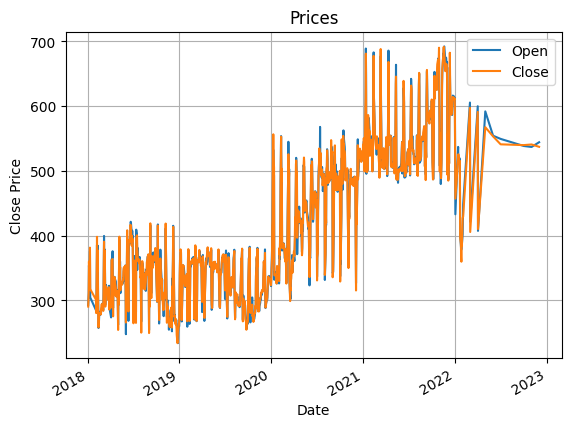

In [ ]:
# Plot a line graph for Open
ax1 = netflix_stock_data['Open'].plot(style=['-'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Prices')
ax1.legend()
plt.grid()
# Plot a line graph for Close
ax1 = netflix_stock_data['Close'].plot(style=['-'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Prices')
ax1.legend()
plt.grid()

The above is Line graph shows the Opening & Closing price of netflix stock of each year.

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

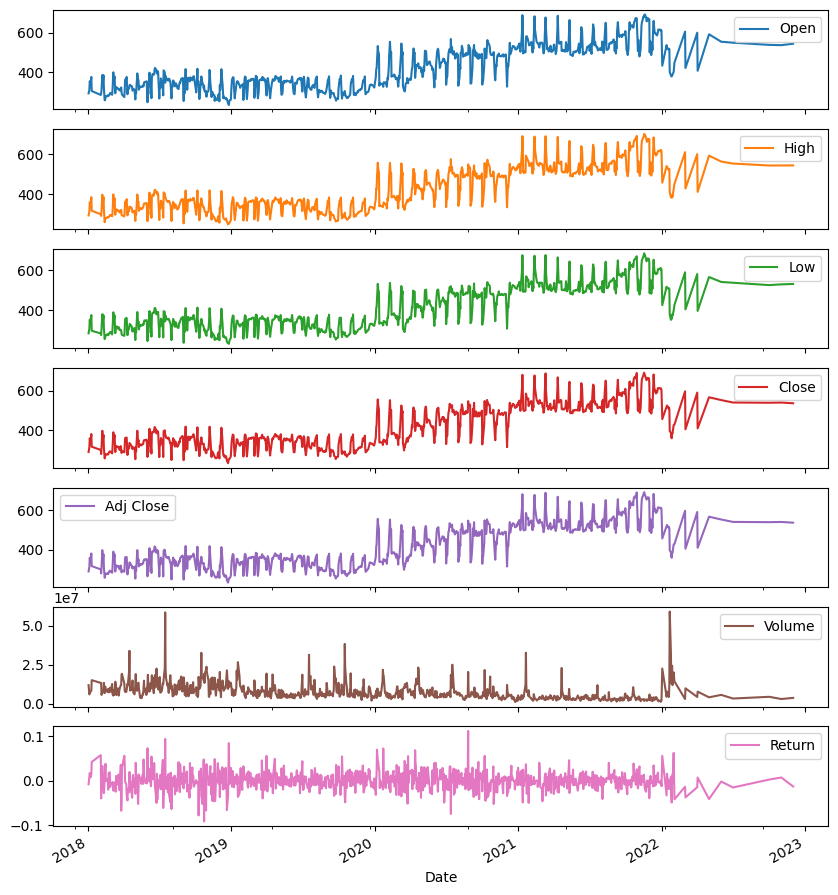

In [ ]:
#plot all at once
netflix_stock_data.plot(subplots=True, figsize=(10,12))

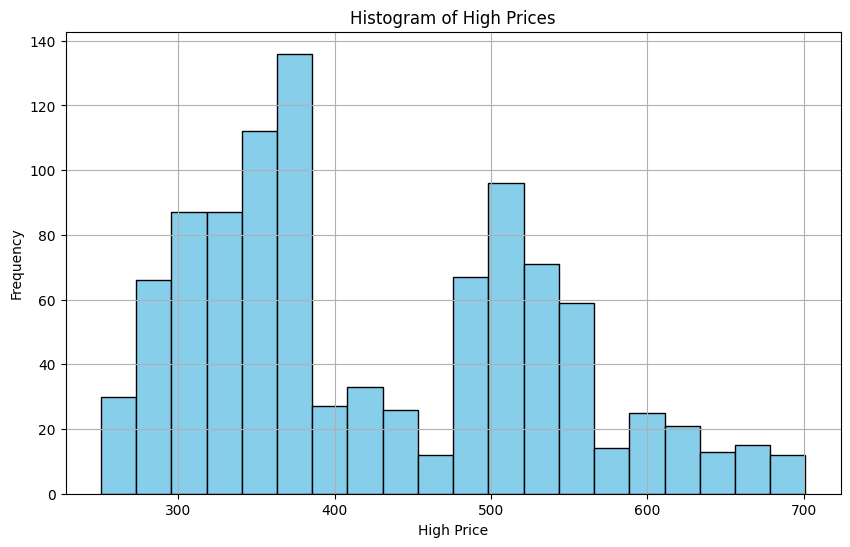

In [ ]:
#Histogram for High Price
plt.figure(figsize=(10, 6))
plt.hist(netflix_stock_data['High'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.title('Histogram of High Prices')
plt.grid()

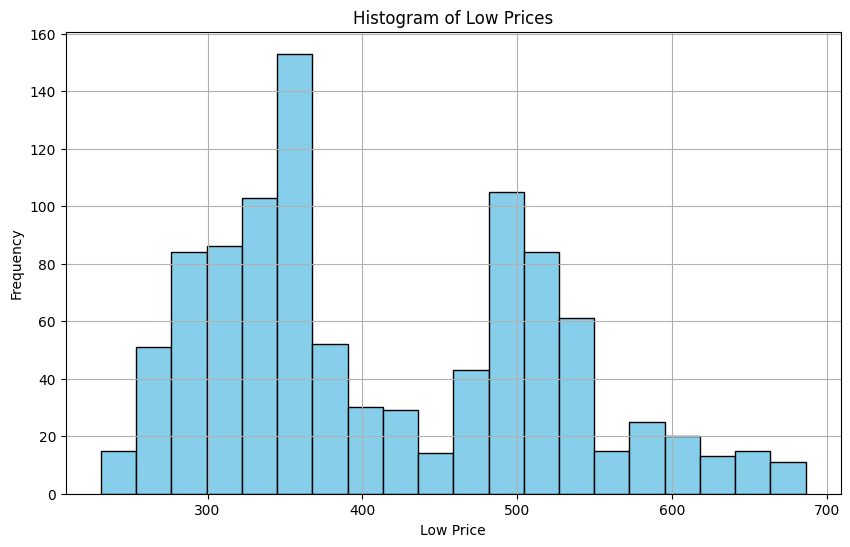

In [ ]:
#Histogram for Low Price
plt.figure(figsize=(10, 6))
plt.hist(netflix_stock_data['Low'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Low Price')
plt.ylabel('Frequency')
plt.title('Histogram of Low Prices')
plt.grid()

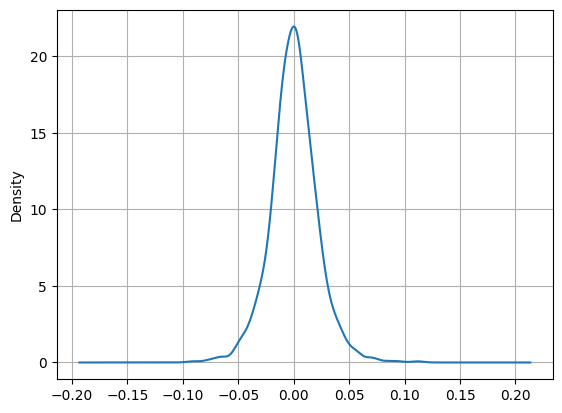

In [ ]:
#Plot kernel density
netflix_stock_data['Return'].plot(kind='kde')
plt.grid()

The resulting curve tells us how the Returns are distributed.
The peaks indicate where the data is more concentrated, and the curve gives you a smooth representation of the data's distribution.

In [ ]:
#resample yearly data
yearly_stock=netflix_stock_data.resample('Y').mean()
yearly_stock

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2018-12-31,328.239869,333.973245,321.455437,327.711842,327.711842,1.149871e+07,-0.001171
2019-12-31,328.637064,332.998691,324.097976,328.872380,328.872380,7.857729e+06,0.000977
2020-12-31,446.141462,454.320039,438.368935,446.827233,446.827233,6.933901e+06,0.002009
2021-12-31,558.536229,565.129443,551.567778,558.217697,558.217697,3.914548e+06,-0.000413
2022-12-31,481.294167,488.809583,467.435834,477.477085,477.477085,1.234271e+07,-0.007155


#**Model Training**#

In [ ]:
#Feature selection (use 'Close Price' as the target variable)
X = netflix_stock_data[['Open','High','Low','Volume','Return']]
Y = netflix_stock_data['Close']

Spliting data into train and test data.

In [ ]:
#Spliting the data into training and testing sets
#The shuffle parameter is used to prevent non-random assignment to the training and test set. By default, the data is randomized before splitting.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,shuffle=False)

Linear Regression

In [ ]:
#Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Make predictions
predictions = model.predict(X_test)

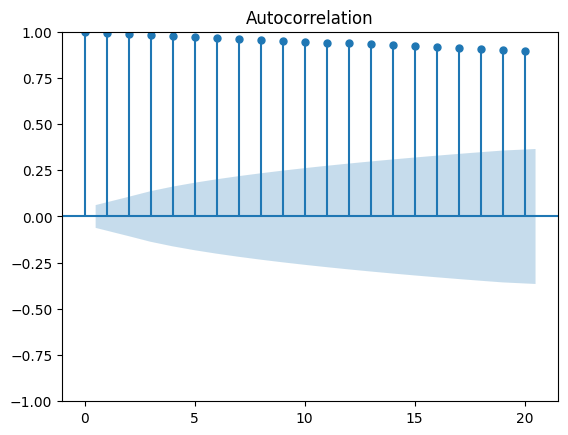

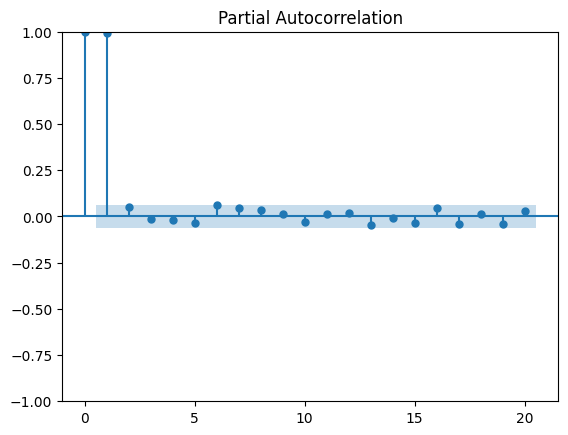

In [ ]:
# Plot the ACF and PACF to determine the order of the ARIMA model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Use the 'Close Price' as the time series data
ts_data = netflix_stock_data['Close']
plot_acf(ts_data, lags=20)
plot_pacf(ts_data, lags=20)
plt.show()

In [ ]:
# Reset the index to avoid warnings
ts_data = ts_data.reset_index(drop=True)

In [ ]:
# Define the ARIMA model and fit it
model = ARIMA(ts_data, order=(1, 1, 0))  # Replace with the appropriate order based on ACF and PACF plots
model_fit = model.fit()

In [ ]:
# Forecast future values
forecast_steps = 202
forecast = model_fit.forecast(steps=forecast_steps)

In [ ]:
# Print the forecasted values
print(f'ARIMA Forecast: {forecast}')

ARIMA Forecast: 1009    409.937489
1010    409.949320
1011    409.948718
1012    409.948749
1013    409.948747
           ...    
1206    409.948747
1207    409.948747
1208    409.948747
1209    409.948747
1210    409.948747
Name: predicted_mean, Length: 202, dtype: float64


In [ ]:
# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(Y_test, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 26769.71743471551


In [ ]:
#Create a DataFrame with the forecast and the corresponding index
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

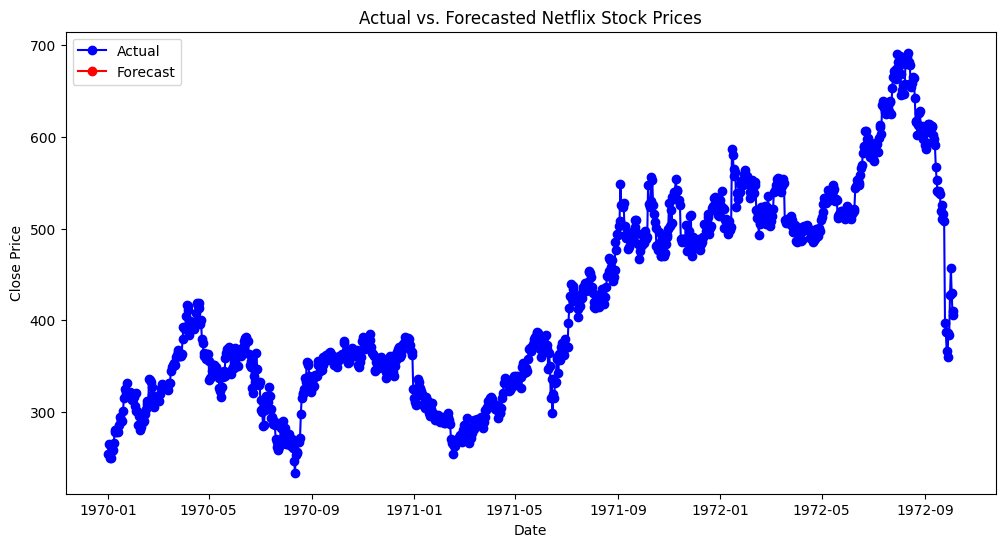

In [ ]:
# Plot the actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(ts_data.index, ts_data, label='Actual', marker='o', color='b')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', marker='o', color='r')
plt.title('Actual vs. Forecasted Netflix Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()